In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

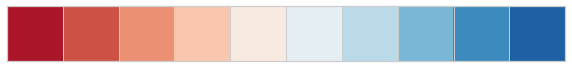

In [2]:
sns.set(style ='whitegrid',font_scale=1.5)
current_palette = sns.color_palette('RdBu',10)
sns.palplot(current_palette)

# Part 1 ‑ Exploratory data analysis 

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

### a quick check on the data

In [3]:
lg_df = pd.read_json('E:/DS/repo/SpringboardRepo/ultimate_challenge/logins.json')

In [4]:
lg_df.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [5]:
lg_df.shape

(93142, 1)

In [6]:
lg_df.describe()

login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

In [7]:
lg_df.isnull().sum()

login_time    0
dtype: int64

#### no missing data. Data collection started from Jan and end on 13rd of April, which covers 101 days

In [8]:
lg_df.set_index('login_time', inplace=True)
lg_df['count'] = 1

In [9]:
re_lg_df = lg_df.resample('15T', label='right').sum()
re_lg_df.head()

count
login_time                
1970-01-01 20:15:00      2
1970-01-01 20:30:00      6
1970-01-01 20:45:00      9
1970-01-01 21:00:00      7
1970-01-01 21:15:00      1

In [10]:
re_lg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [11]:
re_lg_df.isnull().sum()

count    0
dtype: int64

### a general look on the whole period

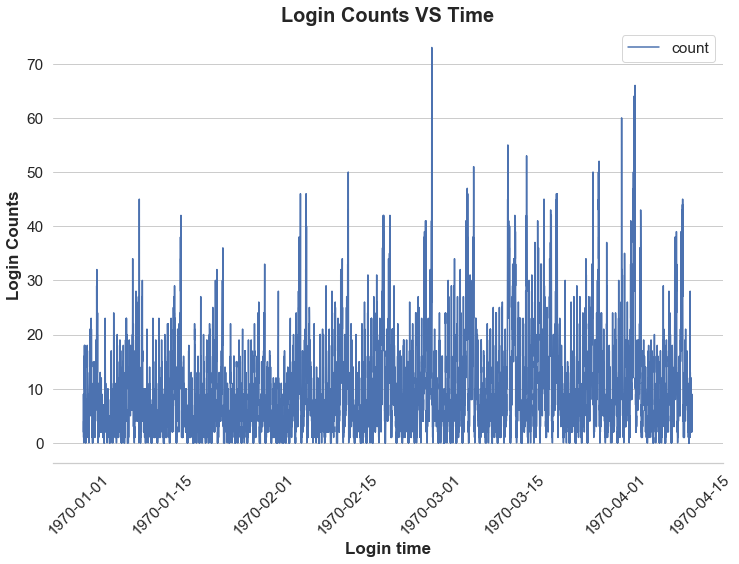

In [12]:
plt.figure(figsize=(12,8))
sns.set(style ='whitegrid',font_scale=1.4)
sns.lineplot(data=re_lg_df)

plt.title('Login Counts VS Time',weight='bold').set_fontsize('20')
plt.xlabel('Login time',weight='bold',fontsize=17)
plt.ylabel('Login Counts',weight='bold',fontsize=17)
plt.xticks(rotation= 45)

plt.grid(axis="x")
sns.despine(left=True)

plt.show()

It's hard to say there is any relationship between the two variables.

### data for different months

In [13]:
jan = re_lg_df['1970-01-01': '1970-01-31']
feb = re_lg_df['1970-02-01': '1970-02-28']
mar = re_lg_df['1970-03-01': '1970-03-31']
apr = re_lg_df['1970-04-01': '1970-04-30']

In [14]:
jan.head()

count
login_time                
1970-01-01 20:15:00      2
1970-01-01 20:30:00      6
1970-01-01 20:45:00      9
1970-01-01 21:00:00      7
1970-01-01 21:15:00      1

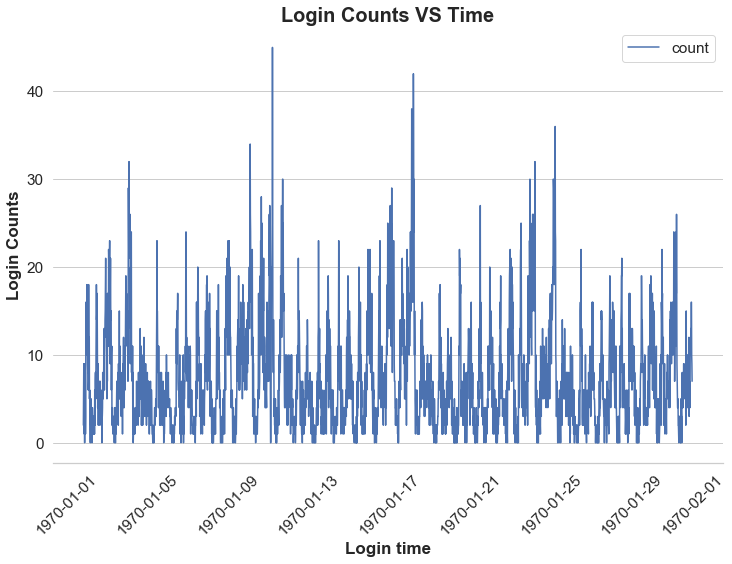

In [15]:
plt.figure(figsize=(12,8))
sns.set(style ='whitegrid',font_scale=1.4)
sns.lineplot(data=jan)

plt.title('Login Counts VS Time',weight='bold').set_fontsize('20')
plt.xlabel('Login time',weight='bold',fontsize=17)
plt.ylabel('Login Counts',weight='bold',fontsize=17)
plt.xticks(rotation= 45)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

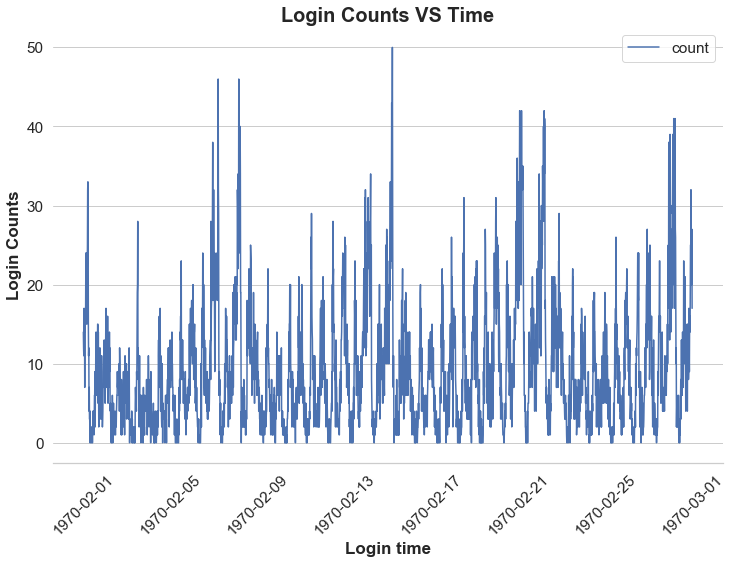

In [16]:
plt.figure(figsize=(12,8))
sns.set(style ='whitegrid',font_scale=1.4)
sns.lineplot(data=feb)

plt.title('Login Counts VS Time',weight='bold').set_fontsize('20')
plt.xlabel('Login time',weight='bold',fontsize=17)
plt.ylabel('Login Counts',weight='bold',fontsize=17)
plt.xticks(rotation= 45)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

It seems that we could find out some trends by week. So I need to creat some new columns for the dataframe.

In [17]:
re_lg_df['time']= pd.to_datetime(re_lg_df.index)
re_lg_df['month']=re_lg_df.time.dt.month
re_lg_df['week']=re_lg_df.time.dt.week
re_lg_df['day']=re_lg_df.time.dt.day
re_lg_df['weekday']=re_lg_df.time.dt.weekday
re_lg_df['hour']=re_lg_df.time.dt.hour
re_lg_df.head(5)

count                time  month  week  day  weekday  \
login_time                                                                  
1970-01-01 20:15:00      2 1970-01-01 20:15:00      1     1    1        3   
1970-01-01 20:30:00      6 1970-01-01 20:30:00      1     1    1        3   
1970-01-01 20:45:00      9 1970-01-01 20:45:00      1     1    1        3   
1970-01-01 21:00:00      7 1970-01-01 21:00:00      1     1    1        3   
1970-01-01 21:15:00      1 1970-01-01 21:15:00      1     1    1        3   

                     hour  
login_time                 
1970-01-01 20:15:00    20  
1970-01-01 20:30:00    20  
1970-01-01 20:45:00    20  
1970-01-01 21:00:00    21  
1970-01-01 21:15:00    21

In [18]:
def count_feature(f):
    #group by the data about the feature
    feature=re_lg_df.groupby(f)['count'].sum().sort_values(ascending=False)
    feature.plot(kind='bar',figsize=(12,8),fontsize= 15,color=['lightblue'])
    #plot the data of the feature
    plt.title((f).capitalize()+' VS Login Counts',weight='bold').set_fontsize('20')
    
    plt.xticks(rotation=0)
    plt.xlabel((f).capitalize(),weight='bold',fontsize=17)
    plt.ylabel('Login Counts',weight='bold',fontsize=17)
    
    plt.grid(axis="x")
    sns.despine(left=True)
    plt.show()

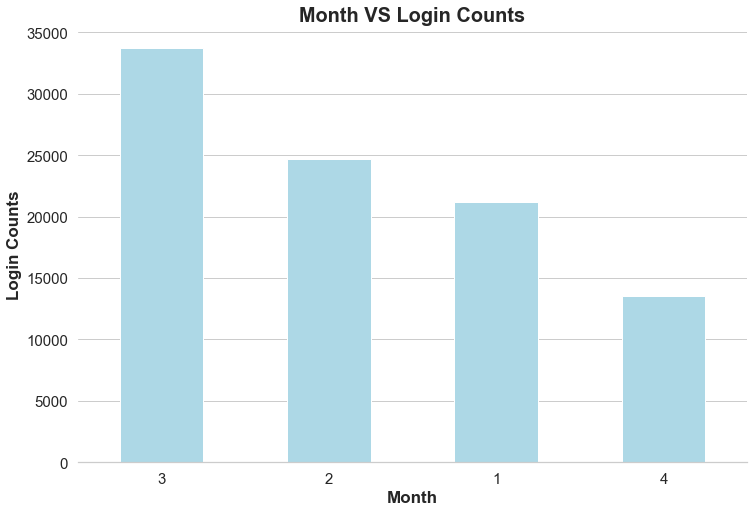

In [19]:
count_feature('month')

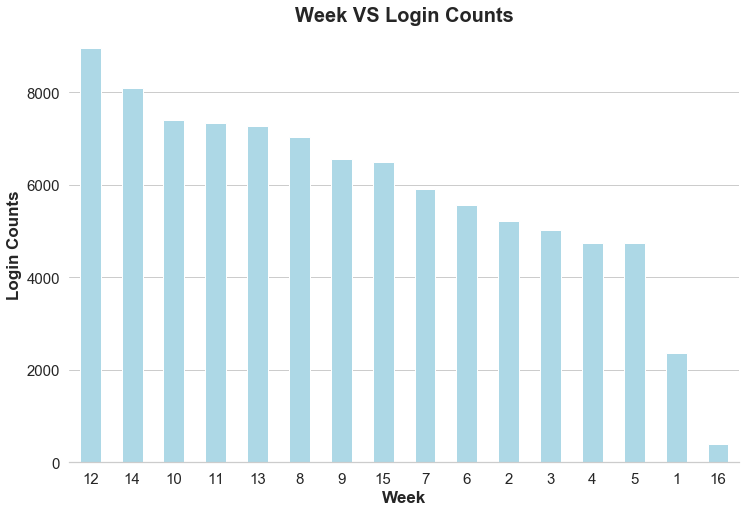

In [20]:
count_feature('week')

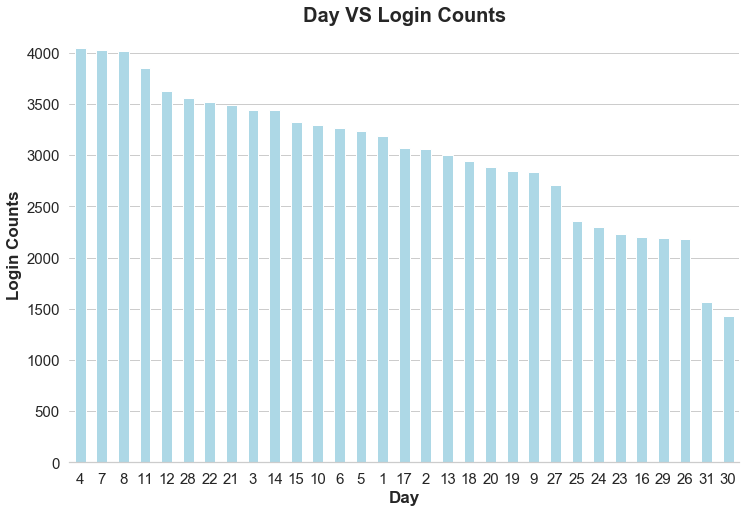

In [21]:
count_feature('day')

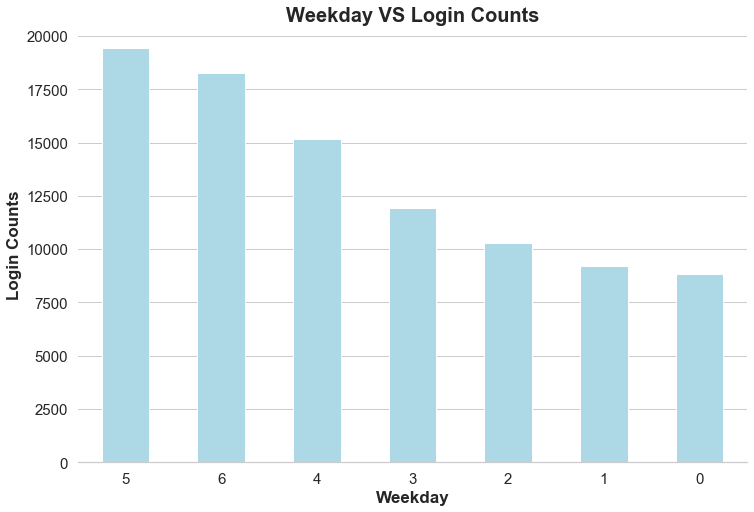

In [22]:
count_feature('weekday')

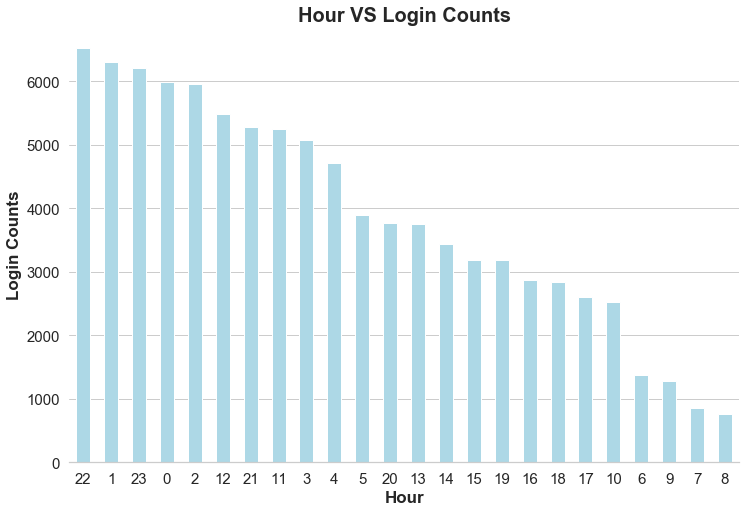

In [23]:
count_feature('hour')

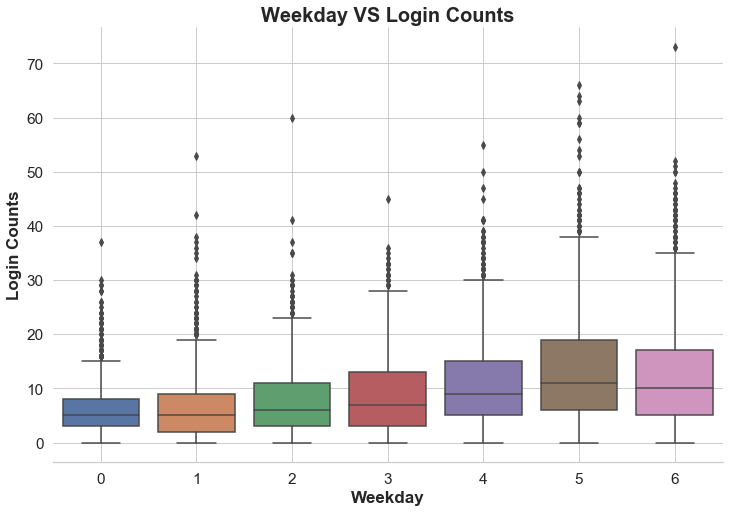

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x='weekday', y='count', data=re_lg_df)
plt.title('Weekday VS Login Counts',weight='bold').set_fontsize('20')
    
plt.xticks(rotation=0)
plt.xlabel('Weekday',weight='bold',fontsize=17)
plt.ylabel('Login Counts',weight='bold',fontsize=17)
    
plt.grid(axis="x")
sns.despine(left=True)
plt.show()

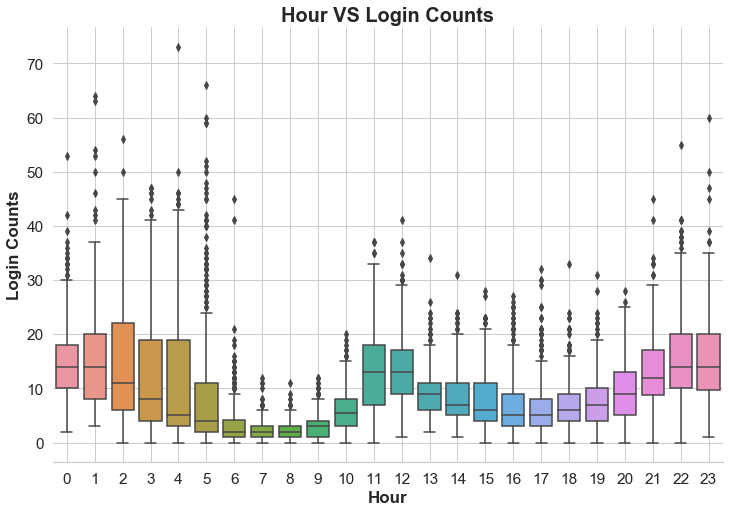

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='hour', y='count', data=re_lg_df)
plt.title('Hour VS Login Counts',weight='bold').set_fontsize('20')
    
plt.xticks(rotation=0)
plt.xlabel('Hour',weight='bold',fontsize=17)
plt.ylabel('Login Counts',weight='bold',fontsize=17)
    
plt.grid(axis="x")
sns.despine(left=True)
plt.show()

### From all those diagrams we could find out :
 1. March has the highest login times.(April only has 13 days).It's hard to say the number is increasing month by month because we only have 3.5 months.
 2. Late of March and early of April have a higher login counts than others.
 3. Late of a week (Thursday to Saturday) have a higher login counts.Coz people prefer to have more activities during weekends.
 4. During a day, 22, 23, 0, 1, 2 have a higher login numbers. That may because of the lack of public transportation during that time.

# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Solutions:
 1. I would like to choose the proportion of tolls which to be waived from the toll cost between the two cities as a key measurement to evaluate the experiment. Because if the proportion increased, means that drivers are more likely to be encouraged by this policy, and be available in both cities.
 2. I would like to choose several months as a sample, take the time, date, vehicle's features, the toll cost, the toll to be waived, the direction as the independent variables.  
  * Visualize the data analysis results, find out the significant relationship.
  * Give some suggestions to improve the experiment.


# Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).
Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYY MM DD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: the average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

## Data Cleaning

In [26]:
df = pd.read_json('E:/DS/repo/SpringboardRepo/ultimate_challenge/ultimate_data_challenge.json')

In [27]:
df.head(5)

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

As we see, there are some missing data in the dataframe need to be fixed.

In [30]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [31]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

## EDA

### geneal analysis

In [32]:
#define a function for catagorical variables:
def count_fea(f):
    plt.figure(figsize=(8,6))
    sns.set(style ='whitegrid',font_scale=1.4)
    sns.countplot(x=f,data=df,palette=sns.color_palette('Blues_d',12))

    plt.xlabel(f,weight='bold',fontsize=17)
    plt.ylabel('Counts',weight='bold',fontsize=17)
    plt.xticks(rotation= 0)

    plt.grid(axis="x")
    sns.despine(left=True)

    plt.show()

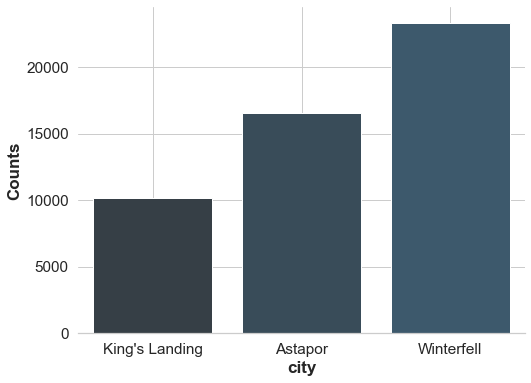

In [33]:
count_fea('city')

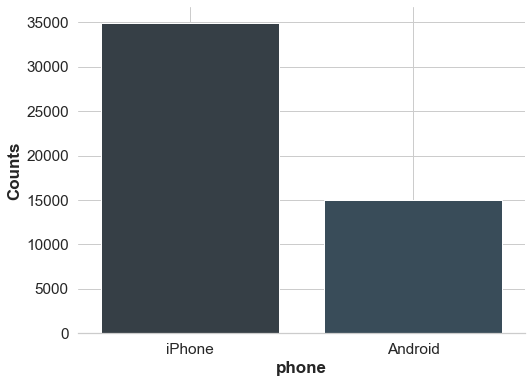

In [34]:
count_fea('phone')

In [35]:
#define a function for numerical variables:
def num_fea(f):
    plt.figure(figsize=(8,6))
    sns.set(style ='whitegrid',font_scale=1.4)
    sns.distplot(df[f],bins=10,color='steelblue')

    plt.xlabel(f,weight='bold',fontsize=17)
    plt.xticks(rotation= 0)

    plt.grid(axis="x")
    sns.despine(left=True)

    plt.show()


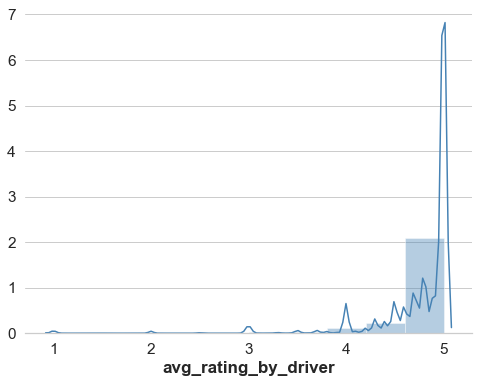

In [36]:
num_fea('avg_rating_by_driver')

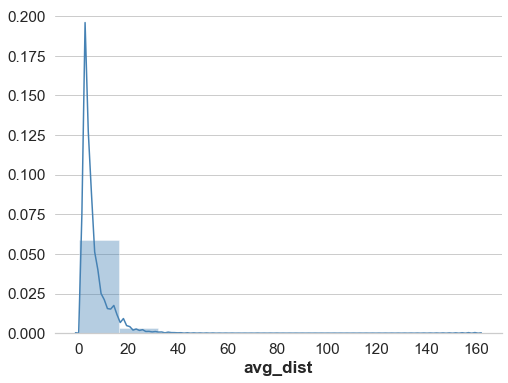

In [37]:
num_fea('avg_dist')

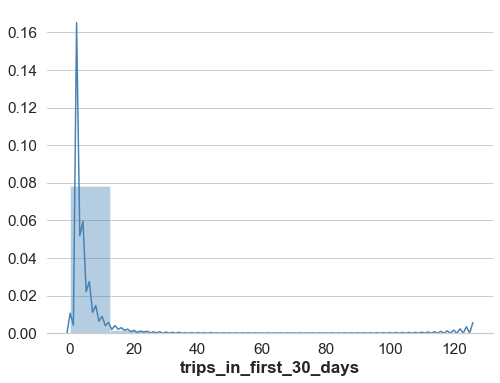

In [38]:
num_fea('trips_in_first_30_days')

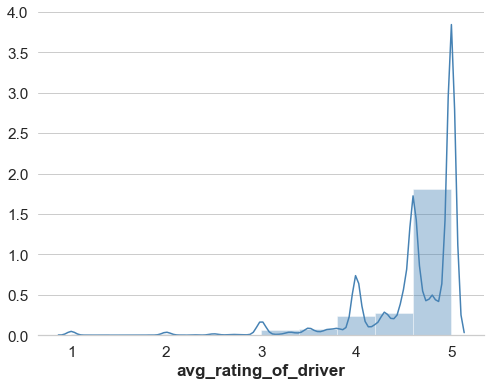

In [39]:
num_fea('avg_rating_of_driver')

In [40]:
#define a function for scatter:
def num_fea(a,b):
    plt.figure(figsize=(8,6))
    df.plot(kind='scatter',x=a,y=b,figsize=(8,6),fontsize= 15,color='steelblue')

    plt.xlabel(a,weight='bold',fontsize=17)
    plt.ylabel(b,weight='bold',fontsize=17)
    plt.xticks(rotation= 0)

    plt.grid(axis="x")
    sns.despine(left=True)

    plt.show()

<Figure size 576x432 with 0 Axes>

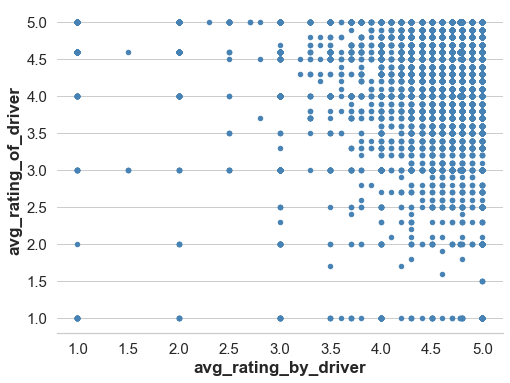

In [41]:
num_fea('avg_rating_by_driver','avg_rating_of_driver')

<Figure size 576x432 with 0 Axes>

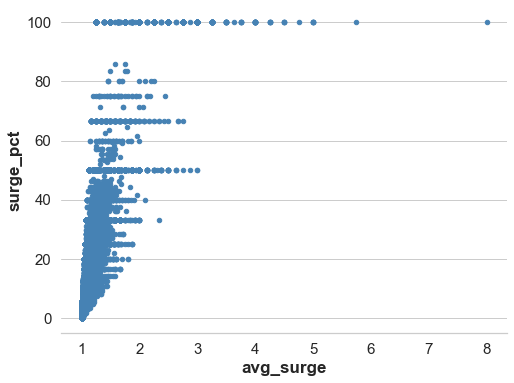

In [42]:
num_fea('avg_surge','surge_pct')

In [43]:
#define a function for analysis two  variables:
def two_fea_con(a):
    f2=df.groupby([a,'ultimate_black_user'])['avg_dist'].mean().sort_values(ascending=False).head(15)
    #plot the data of the feature
    f2.unstack().plot(kind='bar',figsize=(8,6),fontsize= 15,color=['lightblue','#c292a1'])
    plt.title(a+' VS ultimate_black_user',weight='bold').set_fontsize('20')
    
    plt.xticks(rotation=0)
    plt.legend(["ultimate_black_user True", "ultimate_black_user False"],loc = 'lower right')
    plt.xlabel(a,weight='bold',fontsize=17)
    plt.ylabel('avg_dist',weight='bold',fontsize=17)
    
    plt.grid(axis="x")
    sns.despine(left=True)
    plt.show()
    

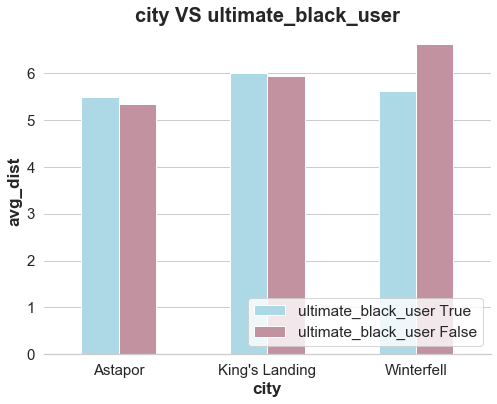

In [44]:
two_fea_con('city')

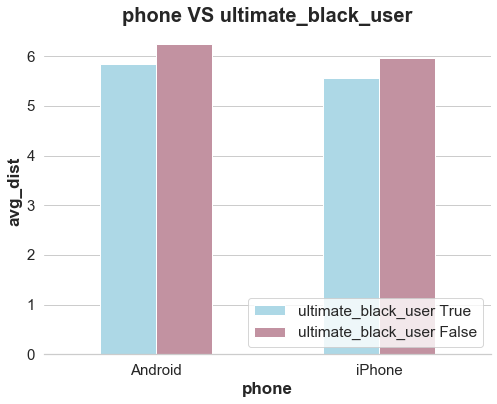

In [45]:
two_fea_con('phone')

## What fraction of the observed users were retained?

In [46]:
df['last_trip_date'].max()

'2014-07-01'

In [47]:
act_df=df[df['last_trip_date'] > '2014-06-01']
ac=len(act_df)
alc=len(df)
d = {'active': [ac], 'non_active': [alc-ac]}
adf = pd.DataFrame(data=d)
adf

active  non_active
0   18310       31690

C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


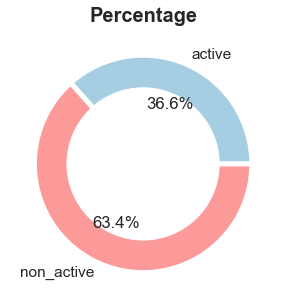

In [48]:

plt.figure(figsize=(5,5))

cmap =plt.get_cmap('Paired')
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(adf,autopct='%1.1f%%',labels=['active','non_active'],wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },colors=colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage', weight='bold').set_fontsize('20')
plt.show()

### 36.6% are retained.

## Prediction Modeling
### Preparing for modeling

In [49]:
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [51]:
## add the target variable and delete useless variables
df['retained'] = (df['last_trip_date'] > '2014-06-01')*1
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)
data_learn=df

In [52]:
##Variables Label Encoding
label_encoder = preprocessing.LabelEncoder()
for i in data_learn.columns:
    if data_learn[i].dtype=='object':
        data_learn[i]= label_encoder.fit_transform(data_learn[i])
          
data_learn['ultimate_black_user'].replace('True',1,inplace=True)
data_learn['ultimate_black_user'].replace('False',0,inplace=True)
data_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  int32  
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  int32  
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  retained                50000 non-null  int32  
dtypes: bool(1), float64(6), int32(3), int64(1)
memory usage: 3.3 MB


In [53]:
y= data_learn.retained
X= data_learn.drop('retained',axis=1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 10)
(10000, 10)
(40000,)
(10000,)


## Compare Models

In [55]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [56]:
models= [("Dummy", DummyClassifier()),("Random Forest", RandomForestClassifier())
         ,('GradientBoosting',GradientBoostingClassifier()),('Decision Tree',DecisionTreeClassifier()),('xgboost',xgb.XGBClassifier())]

### AUC score

C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


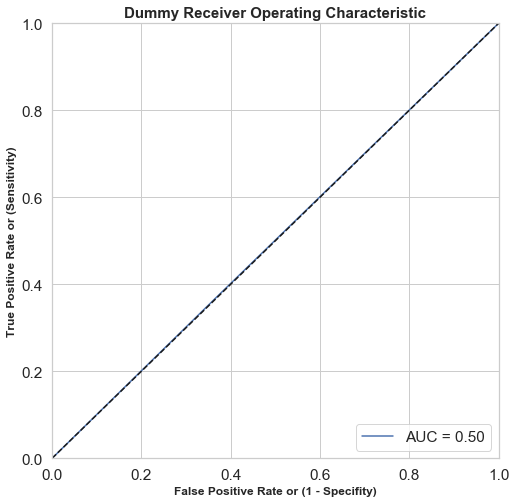

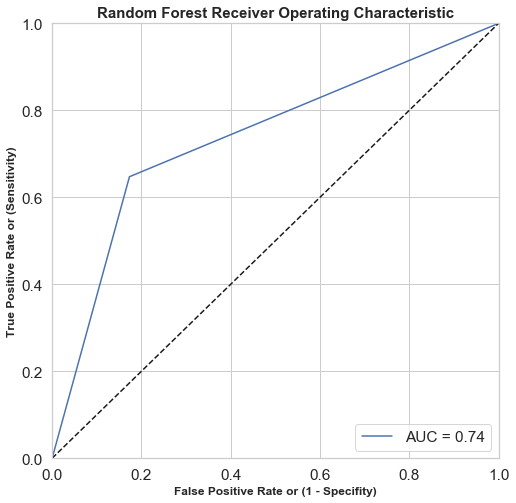

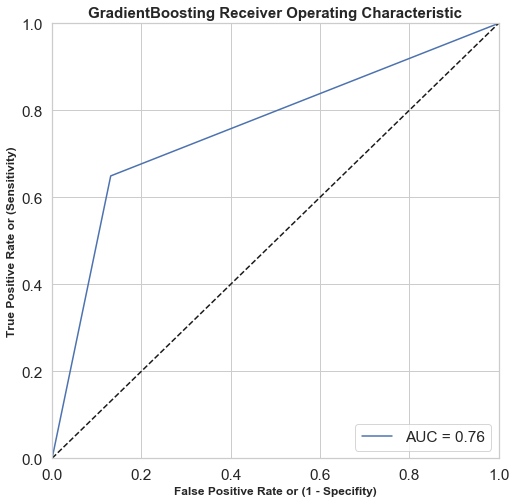

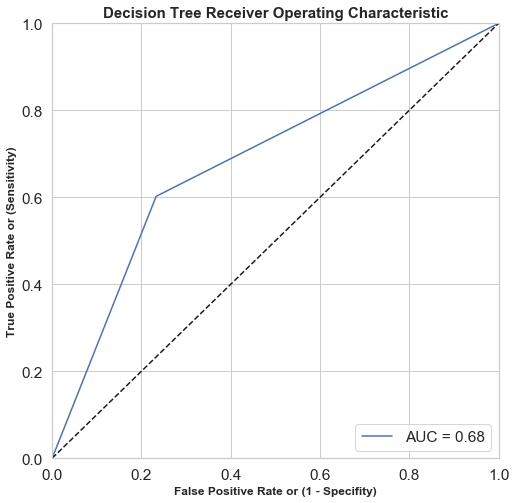

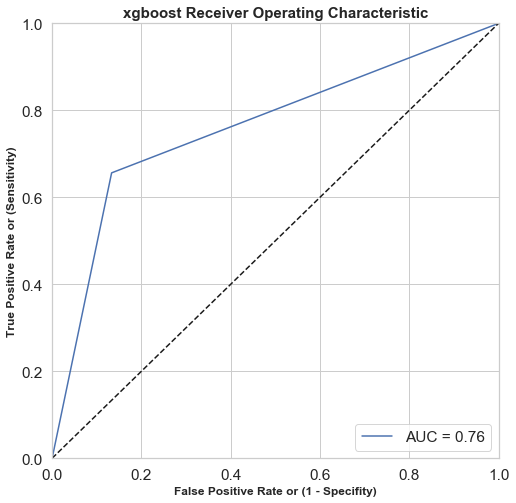

In [57]:
auc_score_list=[]
model_name_list=[]
fpr_list=[]
tpr_list=[]
tpr_list=[]
for name,model in models:
    #split data set
    X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=0.3, random_state=42)
    modeling=model
    modeling.fit(X_train, y_train)
    y_predict=modeling.predict(X_test)
    #compute auc
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
    auc=metrics.auc(fpr, tpr)
    auc_score_list.append(auc)
    model_name_list.append(name)
    
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr,label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)',weight='bold').set_fontsize('12')
    plt.ylabel('True Positive Rate or (Sensitivity)',weight='bold').set_fontsize('12')
    plt.title(name+' Receiver Operating Characteristic',weight='bold').set_fontsize('15')

In [58]:

auc_score_model=pd.DataFrame(data=dict(zip(model_name_list, auc_score_list)), index=[0])
auc_score_model

Dummy  Random Forest  GradientBoosting  Decision Tree   xgboost
0  0.501023       0.737062          0.758995       0.684609  0.761487

## check whether over fit in XGboost

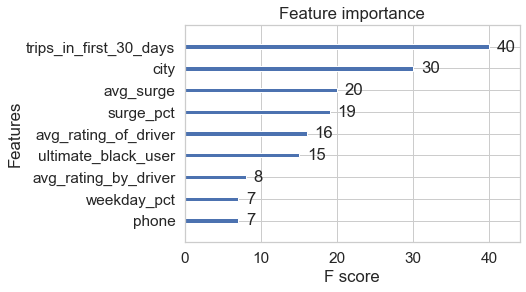

In [59]:

X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=0.3, random_state=42)
xgb_model=xgb.XGBClassifier(colsample_bytree=0.3,learning_rate=0.1,
                max_depth=5, alpha=10)
xgb_model.fit(X_train, y_train)
y_predict=modeling.predict(X_test)


data_matrix=xgb.DMatrix(data_learn)


params = {'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xg_reg = xgb.train(params=params, dtrain=xgb.DMatrix(X_train,label=y_train), num_boost_round=10)

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 12]
plt.show()

According to the feature importance, there is no obvious overfit in this model.

### Cross Vlidation

In [60]:
model_name=[]
for name,model in models:
    model_name.append(name)
    
cross_validation_df = pd.DataFrame(columns=model_name)

for name,model in models:
    kfolds = 5
    split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
    cross_validation_df[name]=cross_val_score(model, X, y, cv=split)

C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [61]:
cross_validation_df

Dummy  Random Forest  GradientBoosting  Decision Tree  xgboost
0  0.5289         0.7587            0.7886         0.7055   0.7897
1  0.5461         0.7627            0.7892         0.7107   0.7877
2  0.5388         0.7664            0.7909         0.7164   0.7890
3  0.5204         0.7606            0.7925         0.7113   0.7908
4  0.5376         0.7631            0.7904         0.7124   0.7908

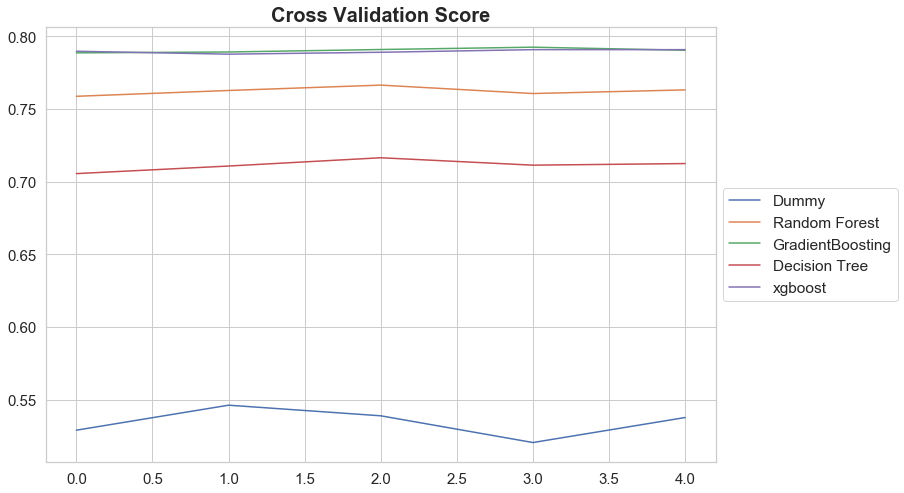

In [62]:

for i in range(len(cross_validation_df.columns)):
    
    cross_validation_df[cross_validation_df.columns[i]].plot(kind='line',figsize=(12,8),fontsize= 15)
    
    plt.title( 'Cross Validation Score',weight='bold').set_fontsize('20')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### xgboost performs best of all the models

The most important features should be'trips_in_first_30_days','city' and 'avg_surge'.
suggestions:
1. take more solutions to encourage the users' activity level in their first 30 days.
2. Take different methods depending on different cities' situation.
3. Adopt more strategies to increase the rate of return during user's surge time.